In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

### Setting ground truth for entire questions

In [2]:
# pre-defining deg_true, a, x_train, y_train, x_test, y_test
deg_true = 2
a = get_a(deg_true)

x_train, y_train = draw_sample(deg_true, a, 10)
x_test, y_test = draw_sample(deg_true, a, 1000)

### Q7:
Write a function called least square estimator taking as input a design matrix X ∈ RN×(d+1) and the corresponding vector y ∈ RN returning bˆ ∈ R(d+1).
Your function should handle any value of N and d, and in particular return an error if N ≤ d. 
(Drawing x at random from the uniform distribution makes it almost certain that any design matrix X with d ≥ 1 we generate is full rank).

In [3]:
# Q7: using the formula b^ = (X⊤X)^(−1) * X⊤ * y

def least_square_estimator(X_design, y):
    # X : R x (d+1), X.shape[0] = R, X.shape[1] = d+1
    # return an error if N ≤ d.
    if X_design.shape[0] <= X_design.shape[1] - 1:
        raise ValueError("N should be greater than d")
    
    b_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
    
    return b_hat

### Q8:
Recall the definition of the empical risk R(f) on a sample {xi , yi} i = 1 for a prediction function f. 

Write a function empirical risk to compute the empirical risk of fb taking as input a design matrix X ∈ RN×(d+1), a vector y ∈ RN and the vector b ∈ R(d+1) parametrizing the predictor.

In [4]:
# Q8: assumption) the loss function same as given in Q5 (R(f) = ∥Xb − y∥2)

def empirical_risk(X_design, y, b):
    f_b = np.linalg.norm(((X_design @ b) - y) **2)
    return f_b

### Q9.
Use your code to estimate bˆ from x train, y train using d = 5. Compare bˆ and a. Make a single plot (Plot 1) of the plan (x, y) displaying the points in the training set, values of the true underlying function g(x) in [0, 1] and values of the estimated function fbˆ(x) in [0,1]. Make sure to include a legend to your plot

The value of a and b_hat are same till d=2. b_hat have more values for d = 3,4,5
The value of a:[2.39319778 0.16601708 4.27649562],
The value of b_hat: [ 2.39319778e+00  1.66017073e-01  4.27649563e+00 -4.21550794e-10
 -5.24323696e-10  5.54564394e-10]


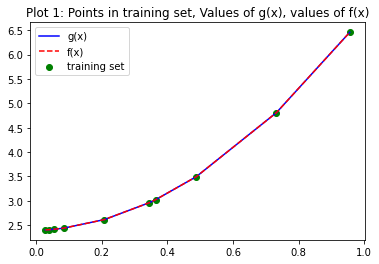

In [5]:
# Q9: Note that I've already made a constant deg_true, a, x_train, y_train above
# d = 5
deg = 5

# converting x_train data into design matrix X
X_train_design = get_design_mat(x_train, deg)

# estimating b_hat 
b_hat = least_square_estimator(X_train_design, y_train)

# comparing a and b_hat: same for given degree, but having additional value for different degree
print('The value of a and b_hat are same till d=2. b_hat have more values for d = 3,4,5')
print('The value of a:{},\nThe value of b_hat: {}'.format(a, b_hat))

# plot: 1) the points in the training set, 2) values of the true underlying function g(x), and 
# 3) values of the estimated function fbˆ(x)
plt.scatter(x_train, y_train, color = 'green', label = 'training set')
plt.plot(x_train, y_train, color = 'blue', label = 'g(x)')
plt.plot(x_train, (X_train_design @ b_hat), '--', color = 'red', label = 'f(x)')
plt.title('Plot 1: Points in training set, Values of g(x), values of f(x)')
plt.legend()
plt.show()

### Q10:
Now you can adjust d. What is the minimum value for which we get a “perfect fit”? 
How does this result relates with your conclusions on the approximation error above?

#### Ans)
Minimum value to get a 'perfect fit' is 2.7681926930917384e-26 (which is almost zero).  
When d = 2, which is same as the degree of a, we get the minimum value since we can get f_b = g.  
This relates with conclusions on the approximation error that if we can choose f_b = g, approximation error is zero. 

In [6]:
# Q10: Note that I've already made a constant deg_true, a, x_train, y_train above

for deg in range(10):
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    print('deg:{}, empirical risk:{}'.format(deg, empirical_risk(X_train_design, y_train, b_hat)))
    

deg:0, empirical risk:10.358488530458251
deg:1, empirical risk:0.5200657985584284
deg:2, empirical risk:6.161800307182587e-29
deg:3, empirical risk:3.929590227242097e-26
deg:4, empirical risk:1.7836416403635516e-22
deg:5, empirical risk:7.160899748387545e-18
deg:6, empirical risk:3.2649218957170393e-15
deg:7, empirical risk:1.255473662049358e-09
deg:8, empirical risk:2.5224043884074496e-05
deg:9, empirical risk:29.49655484446461


### In presence of noise (13 Points)
Now we will modify the true underlying PX ×Y , adding some noise in y = g(x)+ε, with ε ∼ N (0, 1) a standard normal random variable independent from x.  
We will call training error et the empirical risk on the train set and generalization error eg the empirical risk on the test set.

### Q11:
Plot et and eg as a function of N for d < N <1000 for d=2,d=5 and d=10 (Plot 2).  
You may want to use a logarithmic scale in the plot.  
Include also plots similar to Plot 1 for 2 or 3 different values of N for each value of d.

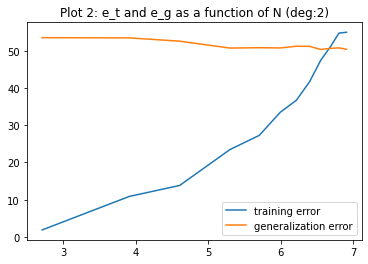

In [21]:
# case 1: d=2

deg = 2
e_t, e_g = [], []

x_test, y_test = draw_sample_with_noise(deg_true, a, 1000)
X_test_design = get_design_mat(x_test, deg)

sample_n = [15, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]

for n in sample_n:    
    N_train = n
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    
    e_t.append((np.log(n), empirical_risk(X_train_design, y_train, b_hat)))
    e_g.append((np.log(n), empirical_risk(X_test_design, y_test, b_hat)))

plt.plot(*zip(*e_t), label = 'training error')
plt.plot(*zip(*e_g), label = 'generalization error')
plt.title('Plot 2: e_t and e_g as a function of N (deg:2)')
plt.legend()
plt.show()

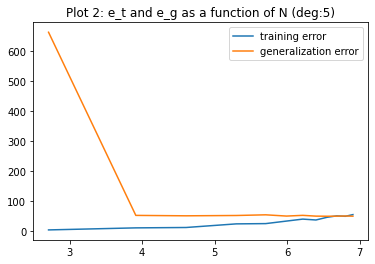

In [27]:
# case 2: d=5
deg = 5
e_t, e_g = [], []

x_test, y_test = draw_sample_with_noise(deg_true, a, 1000)
X_test_design = get_design_mat(x_test, deg)
sample_n = [15, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]

for n in sample_n:
    N_train = n
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    
    e_t.append((np.log(n), empirical_risk(X_train_design, y_train, b_hat)))
    e_g.append((np.log(n), empirical_risk(X_test_design, y_test, b_hat)))

plt.plot(*zip(*e_t), label = 'training error')
plt.plot(*zip(*e_g), label = 'generalization error')
plt.title('Plot 2: e_t and e_g as a function of N (deg:5)')
plt.legend()
plt.show()

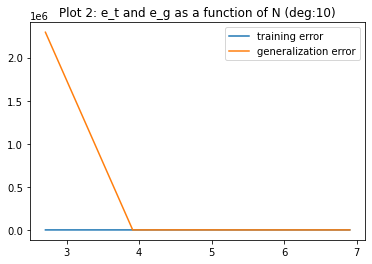

In [9]:
# case 3: d=10

deg = 10
e_t, e_g = [], []

x_test, y_test = draw_sample_with_noise(deg_true, a, 1000)
X_test_design = get_design_mat(x_test, deg)
sample_n = [15, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]

for n in sample_n:    
    N_train = n
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    
    e_t.append((np.log(n), empirical_risk(X_train_design, y_train, b_hat)))
    e_g.append((np.log(n), empirical_risk(X_test_design, y_test, b_hat)))

plt.plot(*zip(*e_t), label = 'training error')
plt.plot(*zip(*e_g), label = 'generalization error')
plt.title('Plot 2: e_t and e_g as a function of N (deg:10)')
plt.legend()
plt.show()

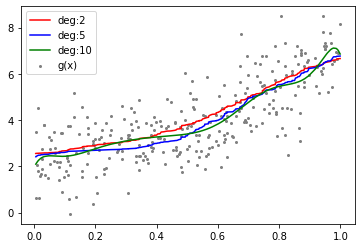

In [10]:
# Include also plots similar to Plot 1 for 2 or 3 different values of N for each value of d.
# case 1: N=300
N_train = 300
deg_list = [2, 5, 10]
estimate_list = []

for deg in deg_list:
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    estimate_list.append(X_train_design @ b_hat)
    
plt.scatter(x_train, y_train, s = 4, color = 'gray', label = 'g(x)')
plt.plot(x_train, estimate_list[0], color = 'red', label = 'deg:2')
plt.plot(x_train, estimate_list[1], color = 'blue', label = 'deg:5')
plt.plot(x_train, estimate_list[2], color = 'green', label = 'deg:10')    

plt.legend()
plt.show()

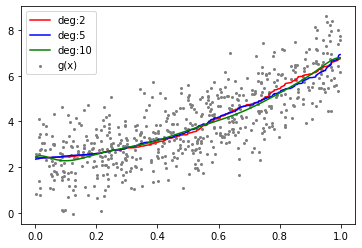

In [11]:
# case 2: N=600
N_train = 600
deg_list = [2, 5, 10]
estimate_list = []

for deg in deg_list:
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    estimate_list.append(X_train_design @ b_hat)
    
plt.scatter(x_train, y_train, s = 4, color = 'gray', label = 'g(x)')
plt.plot(x_train, estimate_list[0], color = 'red', label = 'deg:2')
plt.plot(x_train, estimate_list[1], color = 'blue', label = 'deg:5')
plt.plot(x_train, estimate_list[2], color = 'green', label = 'deg:10')    

plt.legend()
plt.show()

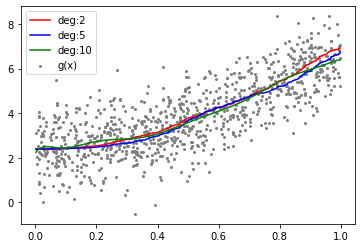

In [12]:
# case 3: N=900
N_train = 900
deg_list = [2, 5, 10]
estimate_list = []

for deg in deg_list:
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    estimate_list.append(X_train_design @ b_hat)
    
plt.scatter(x_train, y_train, s = 4, color = 'gray', label = 'g(x)')
plt.plot(x_train, estimate_list[0], color = 'red', label = 'deg:2')
plt.plot(x_train, estimate_list[1], color = 'blue', label = 'deg:5')
plt.plot(x_train, estimate_list[2], color = 'green', label = 'deg:10')    

plt.legend()
plt.show()

### Q12:
Recall the definition of the estimation error.  
Using the test set, (which we intentionally chose large so as to take advantage of the law of large numbers)  
give an empirical estimator of the estimation error.  
For the same values of N and d above plot the estimation error as a function of N (Plot 3).

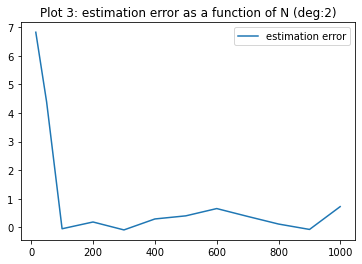

In [13]:
# Q12: Estimation error: R(fˆ)−R(f)
# case 1: d=2

deg = 2
e_d2 = []

N_test = 1000
x_test, y_test = draw_sample_with_noise(deg_true, a, N_test)
X_test_design = get_design_mat(x_test, deg)
b_test = least_square_estimator(X_test_design, y_test)

sample_n = [15, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]

for n in sample_n:    
    N_train = n
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    # Estimation error: R(fˆ)−R(f)
    est_err = empirical_risk(X_test_design, y_test, b_hat) - empirical_risk(X_test_design, y_test, b_test)
    
    e_d2.append((n, est_err))

plt.plot(*zip(*e_d2), label = 'estimation error')
plt.title('Plot 3: estimation error as a function of N (deg:2)')
plt.legend()
plt.show()

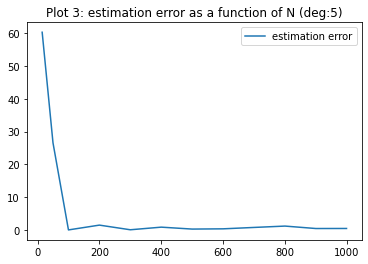

In [14]:
# case 2: d=5
deg = 5
e_d5 = []

N_test = 1000
x_test, y_test = draw_sample_with_noise(deg_true, a, N_test)
X_test_design = get_design_mat(x_test, deg)
b_test = least_square_estimator(X_test_design, y_test)
sample_n = [15, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]

for n in sample_n:
    
    N_train = n
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    est_err = empirical_risk(X_test_design, y_test, b_hat) - empirical_risk(X_test_design, y_test, b_test)
    e_d5.append((n, est_err))

plt.plot(*zip(*e_d5), label = 'estimation error')
plt.title('Plot 3: estimation error as a function of N (deg:5)')
plt.legend()
plt.show()

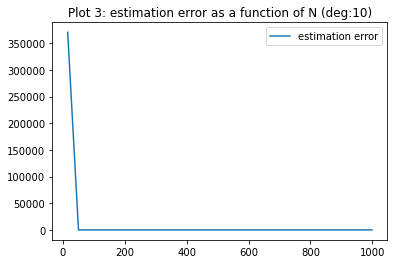

In [15]:
# case 2: d=10
deg = 10
e_d10 = []

N_test = 1000
x_test, y_test = draw_sample_with_noise(deg_true, a, N_test)
X_test_design = get_design_mat(x_test, deg)
b_test = least_square_estimator(X_test_design, y_test)
sample_n = [15, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]

for n in sample_n:
    
    N_train = n
    x_train, y_train = draw_sample_with_noise(deg_true, a, N_train)
    X_train_design = get_design_mat(x_train, deg)
    b_hat = least_square_estimator(X_train_design, y_train)
    est_err = empirical_risk(X_test_design, y_test, b_hat) - empirical_risk(X_test_design, y_test, b_test)
    e_d10.append((n, est_err))

plt.plot(*zip(*e_d10), label = 'estimation error')
plt.title('Plot 3: estimation error as a function of N (deg:10)')
plt.legend()
plt.show()

### Q13:
The generalization error gives in practice an information related to the estimation error.  
Comment on the results of (Plot 2 and 3). What is the effect of increasing N?  
What is the effect of increasing d?

### Ans:
- Plot 2:  
In terms of generalization error, increasing N decreases estimation error, and increasing d decreases estimation more drastically.


- Plot 3:  
In terms of estimation error, increasing N decreases estimation error, and increasing d decreases estimation more drastically.  
From the equation, generalization error: R(fˆ), and Estimation error: R(fˆ)−R(f).  
Therefore, generalization error gives an information of estimation error, and moves in similar way as of estimation error





### Q14:
Besides from the approximation and estimation there is a last source of error we have not discussed here.   
Can you comment on the optimization error of the algorithm we are implementing?

### Ans:
The difference between our current function and most optimized function is called the optimization error.  
This error remains, as we cannot reach to the optimized level in practice.  
It should require massive amounts of data and better optimizers to close the gap, but still this error may exists.  

This can be also explained by comparing constructions of above equations via python or via hand.  
While we can try to construct above equations by hand, we are not able to construct every other cases since we are using our own hand.   
However, computing by python works to construct this equation reflecting every other cases. 

### Q15(optional):
Reporting plots, discuss the again in this context the results when varying N (subsampling the training data) and d.

### Ans:
As we can compute e_t and e_g using the data you are given, it gives similar result.  
In terms of generalization error, increasing N decreases estimation error, and increasing d decreases estimation more drastically.

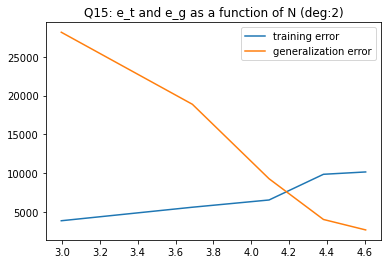

In [17]:
# Q15: f(ozone) = wind
# import data and look for ozone/wind data
ozone_data = np.loadtxt('./ozone_wind.data')
ozone = ozone_data[:, 0]
wind = ozone_data[:, 1]

# d = 2
d = 2
e_t, e_g = [], []

# shuffle dataset
np.random.shuffle(ozone_data)

# split 
N_set = [20, 40, 60, 80, 100]

for N in N_set:
    y_train, x_train = zip(*ozone_data[:N])
    y_test, x_test = zip(*ozone_data[N:])

    x_train = np.array(x_train)
    y_train = np.array(y_train)

    x_test = np.array(x_test)
    y_test = np.array(y_test)

    X_train_design = get_design_mat(x_train, d)
    b_hat = least_square_estimator(X_train_design, y_train)

    X_test_design = get_design_mat(x_test, d)

    e_t.append((np.log(N), empirical_risk(X_train_design, y_train, b_hat)))
    e_g.append((np.log(N), empirical_risk(X_test_design, y_test, b_hat)))
    
plt.plot(*zip(*e_t), label = 'training error')
plt.plot(*zip(*e_g), label = 'generalization error')
plt.title('Q15: e_t and e_g as a function of N (deg:2)')
plt.legend()
plt.show()

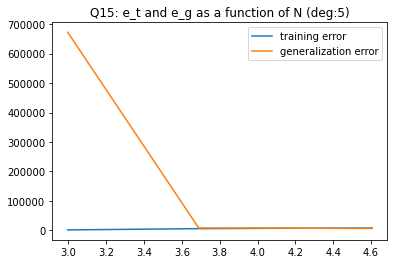

In [30]:
# d = 2
d = 5
e_t, e_g = [], []

# shuffle dataset
np.random.shuffle(ozone_data)

# split 
N_set = [20, 40, 60, 80, 100]

for N in N_set:
    
    y_train, x_train = zip(*ozone_data[:N])
    y_test, x_test = zip(*ozone_data[N:])

    x_train = np.array(x_train)
    y_train = np.array(y_train)

    x_test = np.array(x_test)
    y_test = np.array(y_test)

    X_train_design = get_design_mat(x_train, d)
    b_hat = least_square_estimator(X_train_design, y_train)

    X_test_design = get_design_mat(x_test, d)

    e_t.append((np.log(N), empirical_risk(X_train_design, y_train, b_hat)))
    e_g.append((np.log(N), empirical_risk(X_test_design, y_test, b_hat)))
    
plt.plot(*zip(*e_t), label = 'training error')
plt.plot(*zip(*e_g), label = 'generalization error')
plt.title('Q15: e_t and e_g as a function of N (deg:5)')
plt.legend()
plt.show()


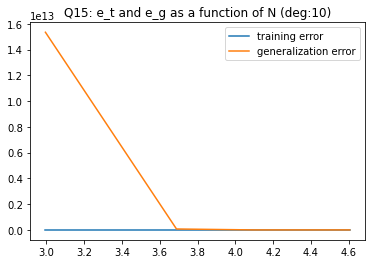

In [19]:
# d = 10
d = 10
e_t, e_g = [], []

# shuffle dataset
np.random.shuffle(ozone_data)

# split 
N_set = [20, 40, 60, 80, 100]

for N in N_set:
    
    y_train, x_train = zip(*ozone_data[:N])
    y_test, x_test = zip(*ozone_data[N:])

    x_train = np.array(x_train)
    y_train = np.array(y_train)

    x_test = np.array(x_test)
    y_test = np.array(y_test)

    X_train_design = get_design_mat(x_train, d)
    b_hat = least_square_estimator(X_train_design, y_train)

    X_test_design = get_design_mat(x_test, d)

    e_t.append((np.log(N), empirical_risk(X_train_design, y_train, b_hat)))
    e_g.append((np.log(N), empirical_risk(X_test_design, y_test, b_hat)))
    
plt.plot(*zip(*e_t), label = 'training error')
plt.plot(*zip(*e_g), label = 'generalization error')
plt.title('Q15: e_t and e_g as a function of N (deg:10)')
plt.legend()
plt.show()